In [46]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [17]:
df= pd.read_csv('/Users/sa24/Desktop/Spotify TLAB/Spotify-Analysis/Raw data/Cleaned Data.csv')

# prepping the data to create an Elbow plot
X1 = df.loc[:, ['len','dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings', 'age']].values


# KMean without Scaling

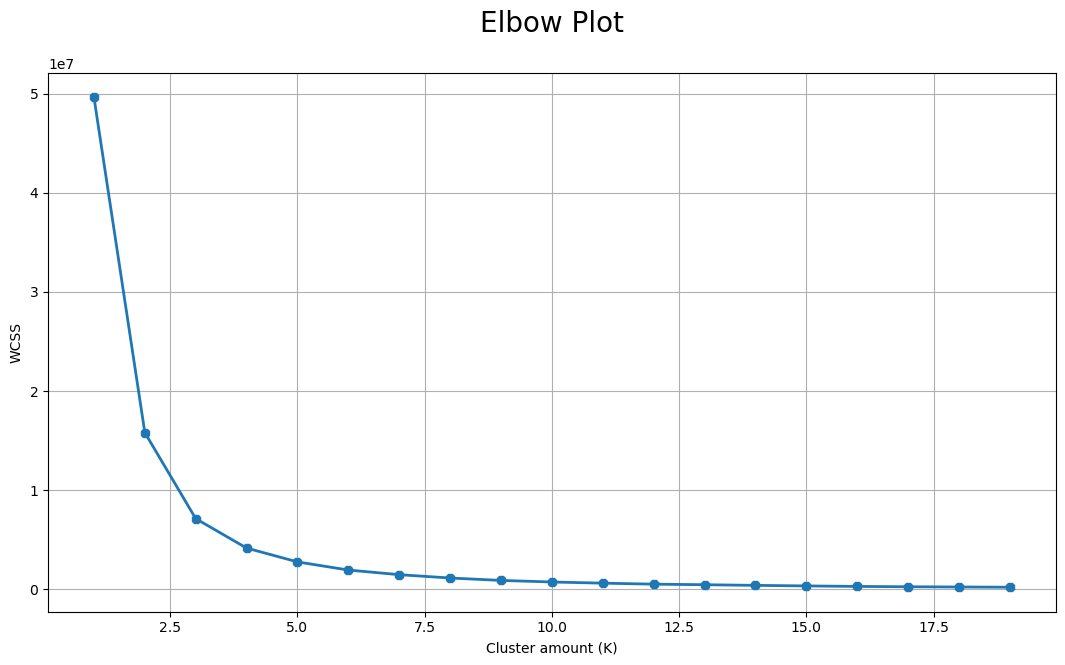

In [18]:
# creating the elbow with WSS
wcss = []
for k in range(1,20):
    kmeans = KMeans(n_clusters= k, init="k-means++" , random_state= 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(13, 7))
plt.plot(range(1, 20), wcss, linewidth= 2, marker='8')
plt.title('Elbow Plot\n', fontsize= 20)
plt.xlabel("Cluster amount (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

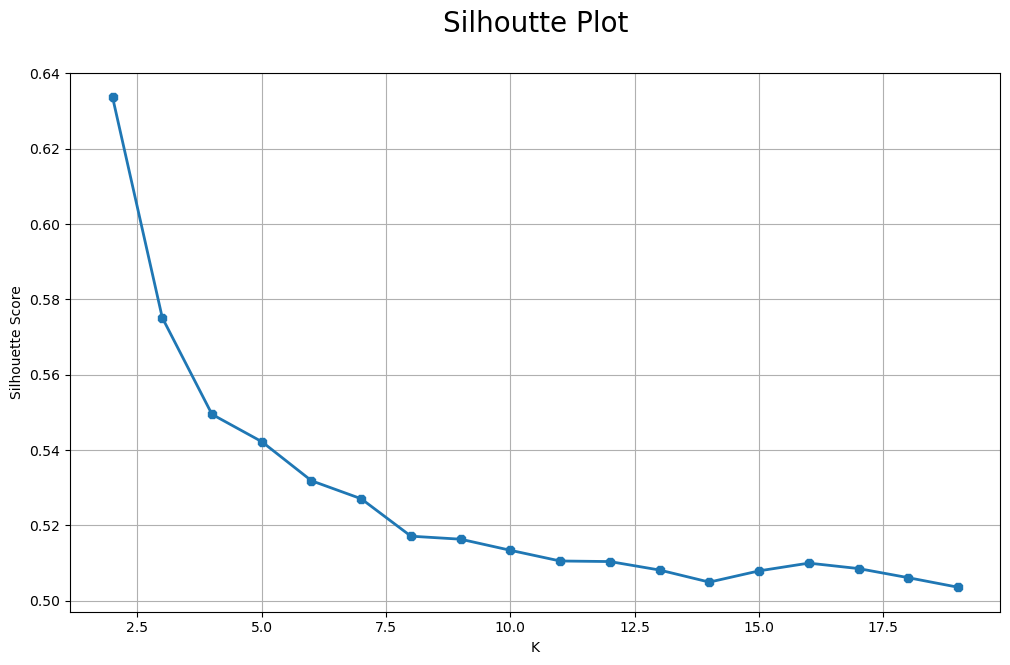

In [19]:
# Create a silhouette Score

silhouette = []
for k in range(2, 20):

    kmeans = KMeans(n_clusters = k, init = 'k-means++',random_state= 42)
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))
plt.plot(range(2, 20), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [20]:

kmeans= KMeans(n_clusters= 5, init = "k-means++", random_state= 42)
# Fit the model to the dataset
kmeans.fit(X1)
# Generate the labels for the dataset
labels= kmeans.fit_predict(X1)
labels


array([1, 3, 0, ..., 1, 3, 1], dtype=int32)

In [21]:
# Get the centroid of the clusters
kmeans.cluster_centers_

array([[3.31370598e+01, 2.11520822e-02, 9.34675026e-02, 1.41942406e-01,
        6.05448281e-02, 1.35581553e-02, 1.60246774e-02, 7.41851968e-02,
        8.24496131e-02, 4.12205796e-02, 7.10322406e-02, 3.06116615e-02,
        5.18861028e-02, 2.41653962e-02, 1.60201469e-01, 3.29232229e-02,
        5.06739599e-01],
       [9.10354075e+01, 2.02515405e-02, 1.46904617e-01, 1.08557749e-01,
        5.82872329e-02, 1.96479854e-02, 1.85039247e-02, 3.43076660e-02,
        7.47236588e-02, 1.00247169e-01, 5.53706318e-02, 5.60781362e-02,
        4.93290070e-02, 2.54993412e-02, 1.17331906e-01, 3.04399551e-02,
        3.66097408e-01],
       [1.28993900e+02, 2.02608925e-02, 1.38904971e-01, 9.66241301e-02,
        4.95373099e-02, 2.35382538e-02, 1.73764676e-02, 2.57427508e-02,
        6.66514781e-02, 1.86266963e-01, 4.57414474e-02, 6.38702860e-02,
        4.19784161e-02, 2.51232066e-02, 8.06660854e-02, 3.12824708e-02,
        3.15305756e-01],
       [6.12590065e+01, 2.27690265e-02, 1.22192449e-01, 1.275

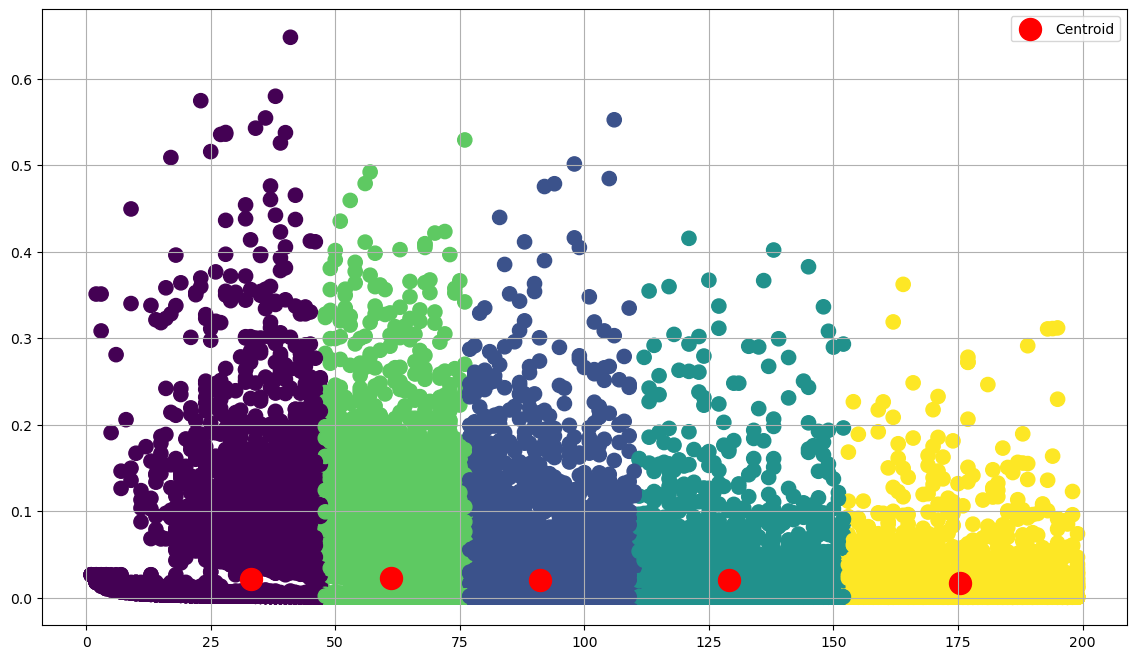

In [22]:
plt.figure(figsize = (14, 8))
plt.scatter(X1 [:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250, label= "Centroid")
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.grid(True)
plt.show()

# K Means Cluster with Scaling

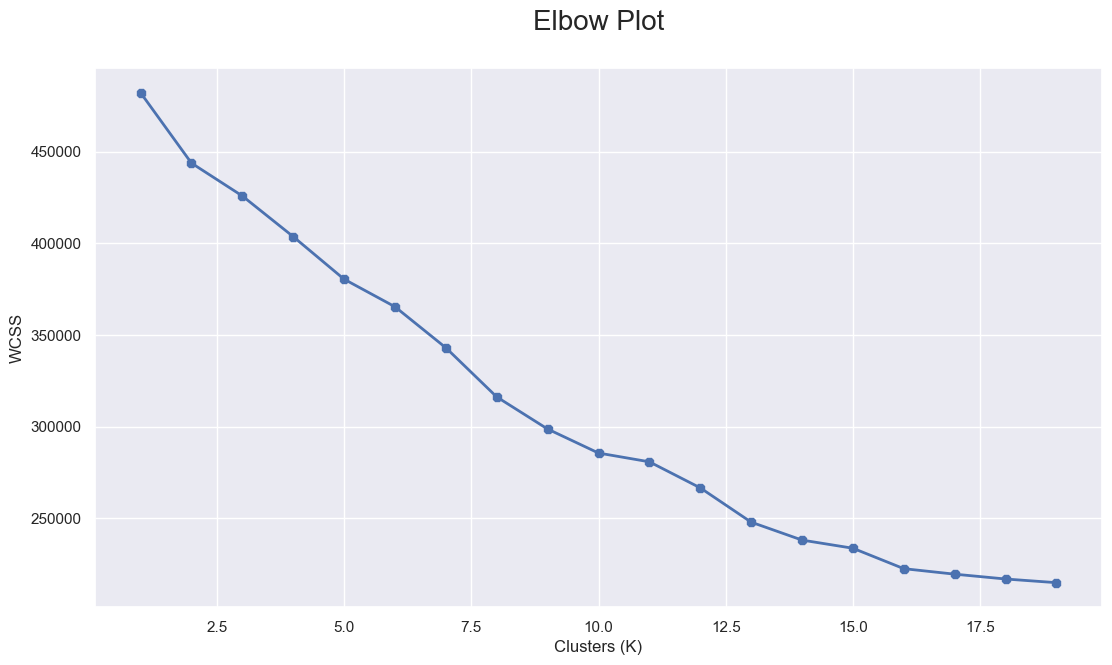

In [28]:
scaler = StandardScaler()

X1_scaled = scaler.fit_transform(X1)

wcss_scaled = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X1_scaled)
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize=(13, 7))
plt.plot(range(1, 20), wcss_scaled, linewidth=2, marker='8')
plt.title('Elbow Plot\n', fontsize=20)
plt.xlabel('Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

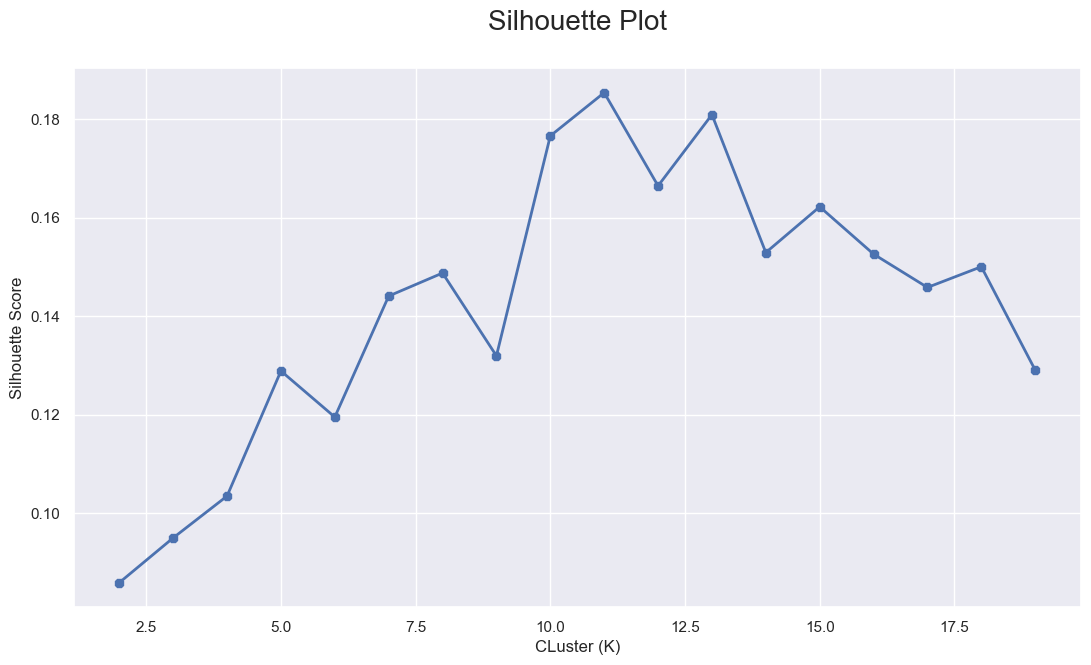

In [29]:
# Create Scaled Silhouette Score Plot 
silhouette_scaled = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    predictions = kmeans.fit_predict(X1_scaled)
    silhouette_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize = (13, 7))
plt.plot(range(2, 20), silhouette_scaled, linewidth = 2, marker = '8')
plt.title('Silhouette Plot\n', fontsize = 20)
plt.xlabel('CLuster (K)')
plt.ylabel('Silhouette Score')
plt.show()


# After doing both plots the best K seems to be 11

In [37]:
# Use the 11 clusters to make a new scaled KMeans object
kmeans_scaled = KMeans(n_clusters=11, init="k-means++", n_init=30, random_state =42)
kmeans_scaled.fit(X1_scaled)

KMeans(n_clusters=11, n_init=30, random_state=42)

In [38]:
#label the scaled data
labels = kmeans_scaled.fit_predict(X1_scaled)
labels

array([10,  5,  1, ...,  3,  3,  3], dtype=int32)

In [39]:
# Get the centroids
kmeans_scaled.cluster_centers_

array([[ 1.32946011e-01, -2.36190684e-01,  8.68747183e-02,
        -1.20824511e-01, -2.00872899e-01, -1.76257069e-01,
        -8.92371311e-02, -2.70511869e-01, -4.16347633e-01,
        -6.01395761e-03, -1.50964452e-01,  2.86268901e+00,
        -2.12868462e-01, -1.00420849e-01, -2.63980647e-01,
        -2.50028743e-01,  3.41264539e-02],
       [-2.41527653e-01, -1.35861045e-01, -4.56460673e-01,
        -4.18913277e-01, -2.24455881e-01, -6.95019835e-02,
        -6.09053799e-02, -2.02942165e-01, -9.14823731e-02,
        -3.87694362e-01,  2.89282493e+00, -7.75459995e-02,
         2.06001254e-01,  1.11957935e-01, -3.79929670e-01,
        -1.42010166e-01,  4.02627628e-01],
       [-2.16588246e-01,  4.18589768e+00, -3.22075482e-01,
        -1.69012077e-01,  2.22161507e-02,  8.59383693e-02,
        -3.24166693e-02,  4.85942186e-02, -2.79474170e-01,
        -1.54019629e-01, -3.35240064e-02, -3.12975938e-01,
        -2.94053836e-01, -2.04260061e-01, -1.72914515e-02,
        -5.49471330e-02,  2.9

/var/folders/fz/fjrs1yms7rbcd_w7wg96j1fm0000gn/T/ipykernel_58753/3270246090.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend( )


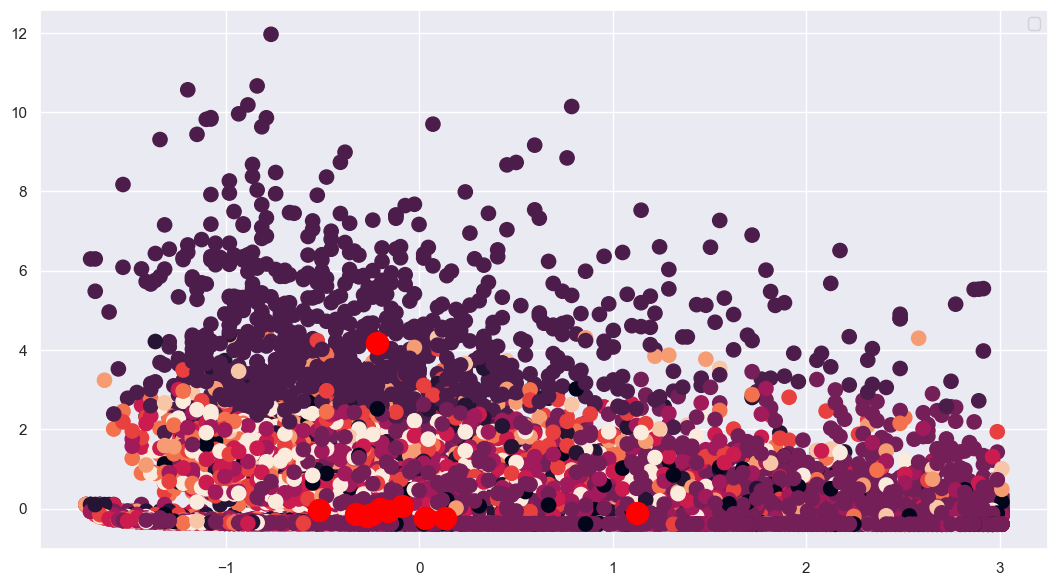

In [45]:
plt.figure(figsize = (13, 7))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s = 105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color = 'red', s = 250)
plt.legend( )
plt.xlabel('')
plt.ylabel('')
plt.grid(True)


plt.show()

# There are too many features to get a accureate read on the data. I'll have to use PCA to make it readable 

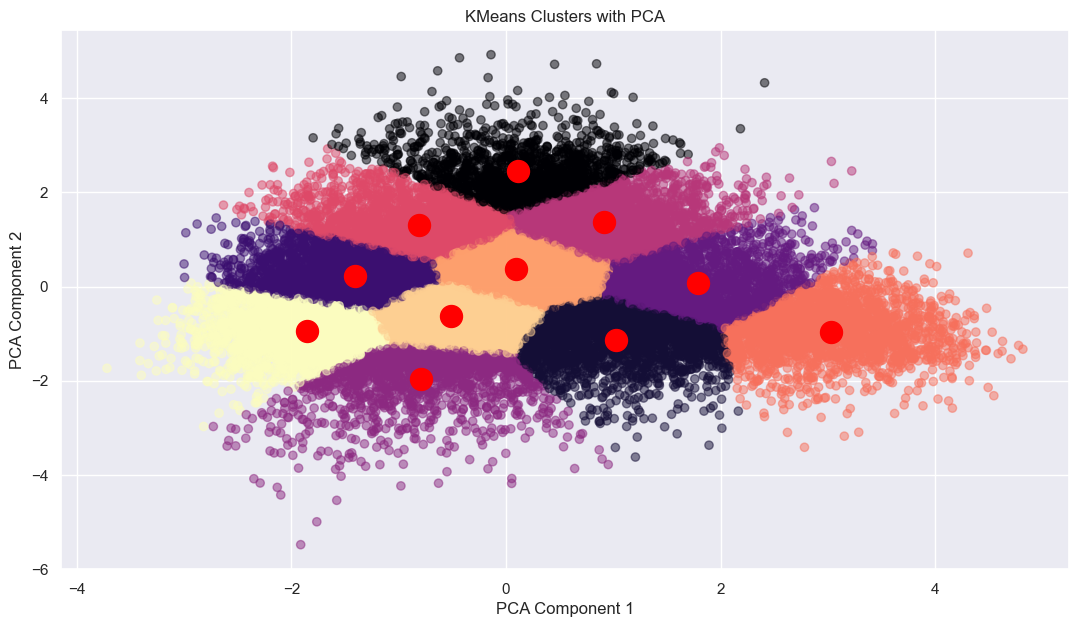

In [49]:
pca = PCA(n_components=2)
clean_pca = pca.fit_transform(X1_scaled)

clusters = kmeans_scaled.fit_predict(clean_pca)

plt.figure(figsize=(13, 7))
plt.scatter(clean_pca[:, 0], clean_pca[:, 1], c = clusters, cmap= "magma", alpha = 0.5)
plt.scatter(kmeans_scaled.cluster_centers_[:,0], kmeans_scaled.cluster_centers_[:,1], color="red", s=250)
plt.title('KMeans Clusters with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()